Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. 
Determine the number of clusters using the elbow method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/Users/lokeshkhabiya/FourthYearStuff/practicals/lp-3/ML/Dataset/sales_data_sample.csv', encoding='latin1')

# Continue with the rest of the clustering and analysis steps

In [3]:
# Step 2: Data Preprocessing
# (Include preprocessing steps like handling missing values and encoding categorical variables if needed)

In [4]:

# Step 3: Feature Selection
# Select relevant features for clustering (e.g., 'Quantity' and 'Revenue')

In [5]:
# Step 4: Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['QUANTITYORDERED', 'SALES']])

In [6]:
# Step 5: K-Means Clustering and Elbow Method
wcss = []  # Within-cluster sum of squares

In [7]:
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

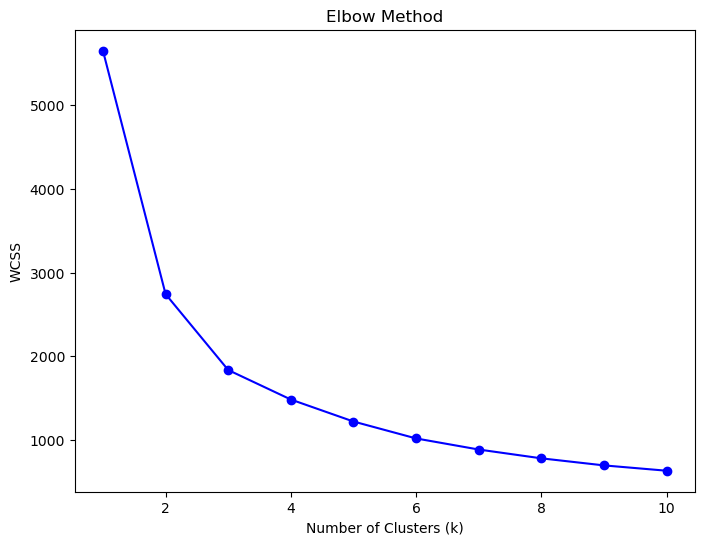

In [8]:
# Step 6: Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [9]:

# Step 6 (cont'd): Determine the optimal number of clusters from the plot

In [10]:
# Step 7: Cluster Visualization
# Re-run K-Means with the chosen number of clusters and visualize the clusters
optimal_k = 3  # Choose the optimal k from the elbow method

In [11]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


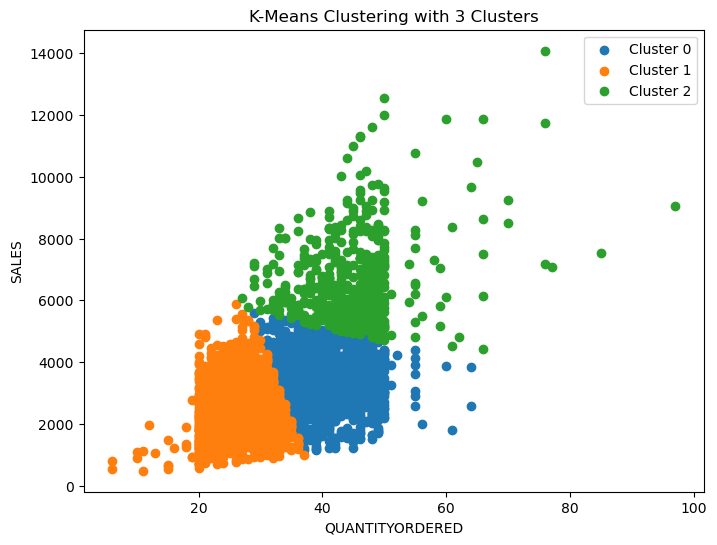

In [12]:
# Visualize the clusters (for example, with scatter plots)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(data[data['Cluster'] == cluster]['QUANTITYORDERED'], data[data['Cluster'] == cluster]['SALES'], label=f'Cluster {cluster}')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.legend()
plt.show()